In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#import hvplot
import hvplot.pandas
hvplot.extension('matplotlib', 'plotly')
#from bokeh.io import show    C:\Users\DELL LAPTOP\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf

C:\Users\Kumar\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv(r'C:\Users\Kumar\OneDrive - The City University of New York\Desktop\NYL Data Analysis\train.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

<Axes: >

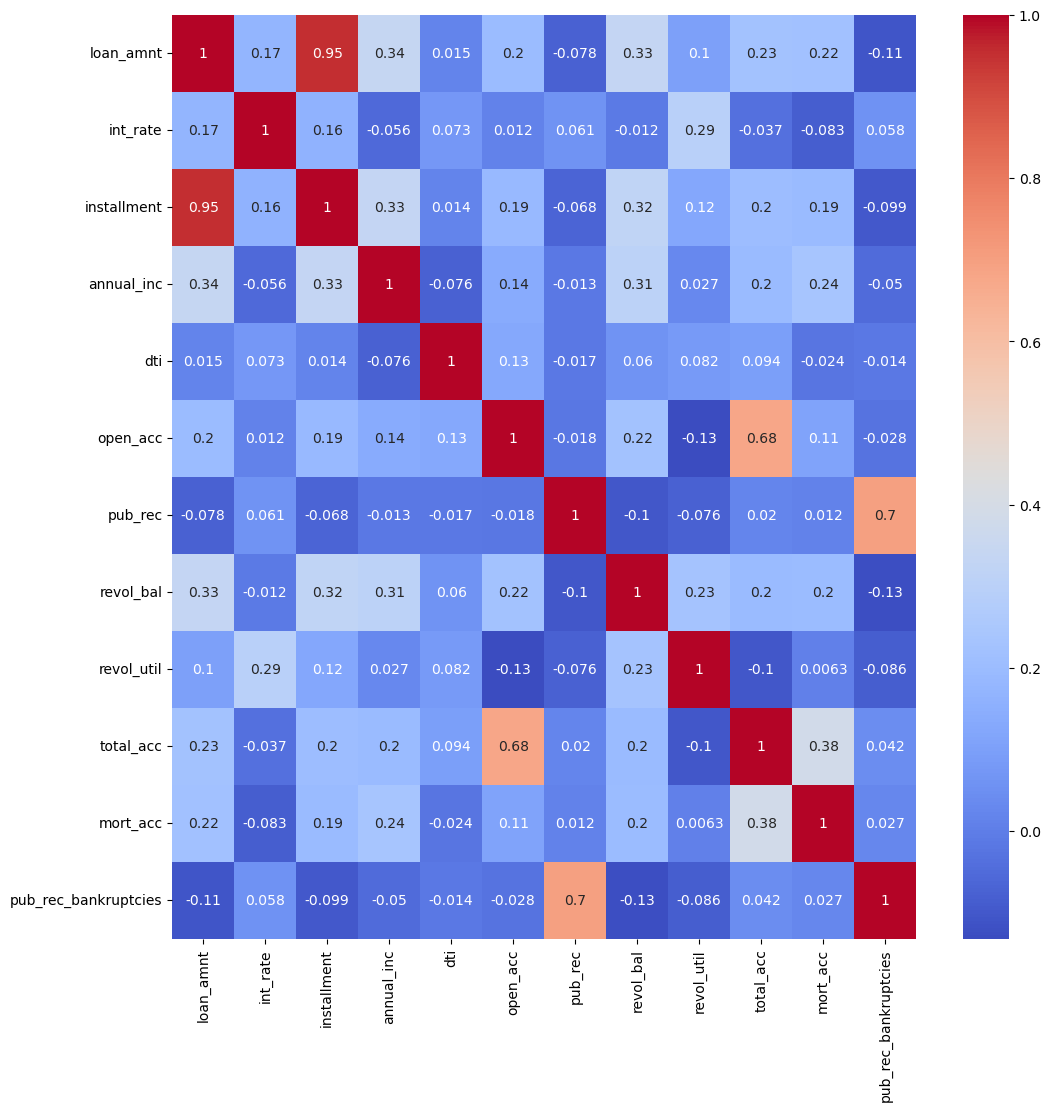

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

Comparing loan amount and installment as there is a high correlation, and checking if they convey the same information
in terms if "re-payment".
Installment is monthly and loan_amnt is listed amount by borrower

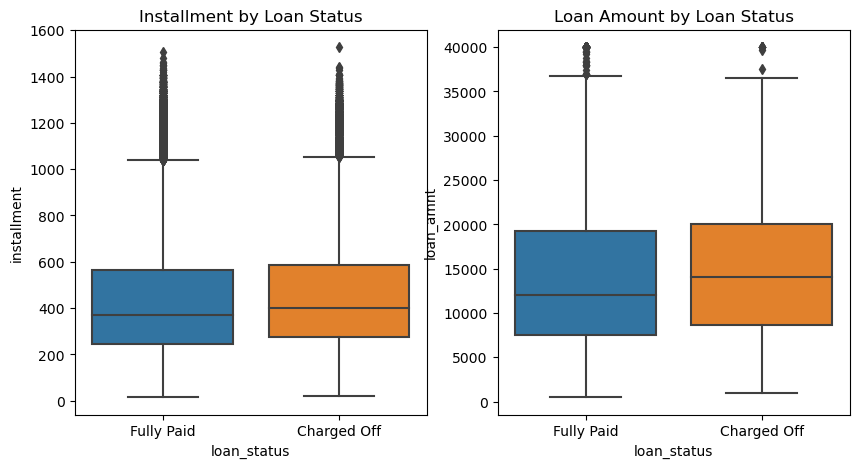

In [7]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Create boxplots with hue "loan_status"
sns.boxplot(x="loan_status", y="installment", data=df, ax=axs[0])
sns.boxplot(x="loan_status", y="loan_amnt", data=df, ax=axs[1])

# Set titles
axs[0].set_title('Installment by Loan Status')
axs[1].set_title('Loan Amount by Loan Status')

# Display the plots
plt.show()

Both charts are not significantly different in terms of loan status from each other, to reduce complexity we shall retain loan_amount instead installment 

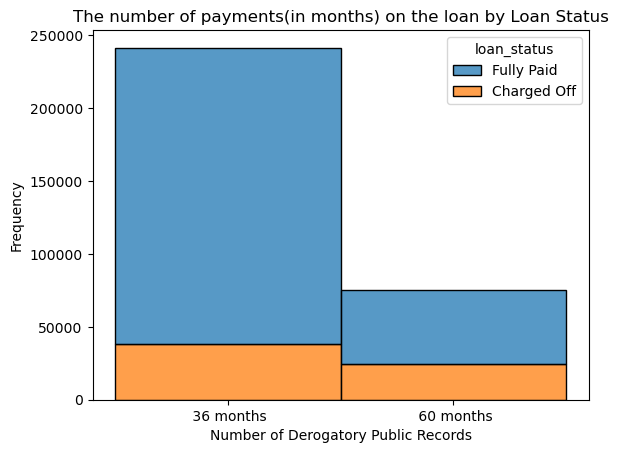

In [8]:
sns.histplot(data=df, x="term", hue="loan_status", multiple="stack", bins=20, binwidth=5)

# Setting the plot title and X & Y labels
plt.title("The number of payments(in months) on the loan by Loan Status")
plt.xlabel("Number of Derogatory Public Records")
plt.ylabel("Frequency")

# Show the plot
plt.show()

Interest rates as shown below will be capped(based on charged-off) using bridging methods due to outliers as shown below.

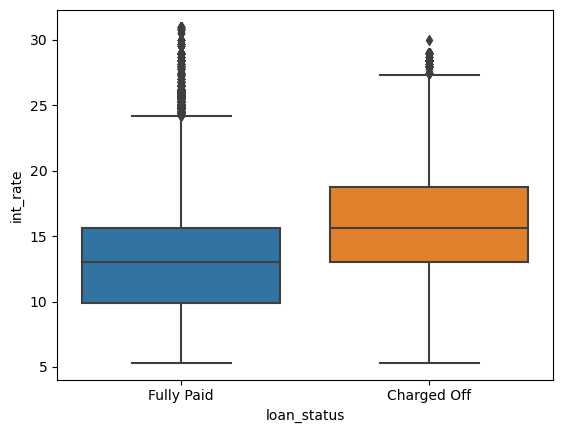

In [9]:
sns.boxplot(x="loan_status", y="int_rate", data=df)
plt.show()

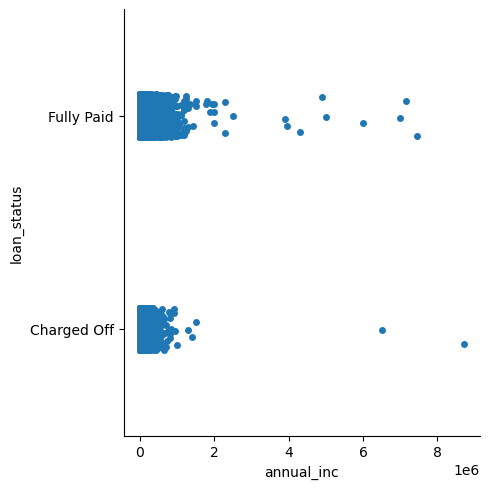

In [9]:
sns.catplot(data=df, x="annual_inc", y="loan_status")

Exploring dti alongside income

:NdOverlay   [loan_status]
   :Histogram   [dti]   (dti_count)
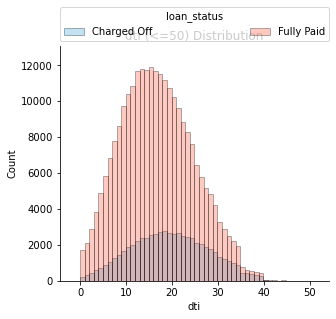

In [20]:
title="Loan Status by dti"

sub_dti2 = df[df['dti']<=50].hvplot.hist(
    y='dti',by='loan_status', bins=50, width=400, height=350, 
    title="dti (<=50) Distribution", xlabel='dti', ylabel='Count', alpha=0.3, legend='top'
)


# Display the plot using Bokeh
sub_dti2

:Layout
   .NdOverlay.I    :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .Distribution.I :Distribution   [annual_inc]   (Density)
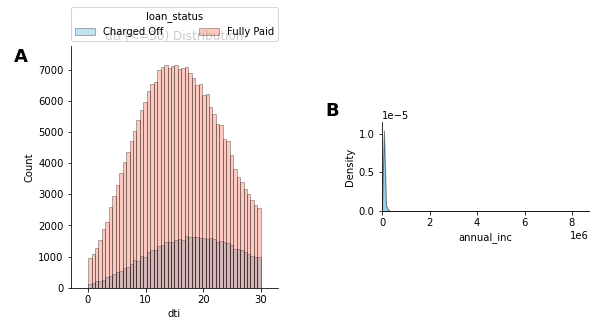

In [21]:
dti = df[df['dti']<=30].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', 
    alpha=0.3, legend='top'
)

title="Loan Status by annual income"

annual_inc = df.hvplot.kde(
    y='annual_inc'
)



dti + annual_inc

In [22]:
df['annual_inc'].describe()

count    3.169700e+05
mean     7.419622e+04
std      6.108367e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

no clear indication of defaulters with respect to annual income

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)
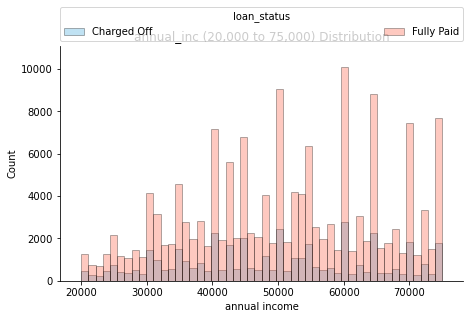

In [24]:
income_range = df[(df['annual_inc'] >= 20000) & (df['annual_inc'] <= 75000)]
annual_inc = income_range.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, width=600, height=350, 
    title="annual_inc (20,000 to 75,000) Distribution", xlabel='annual income', ylabel='Count', 
    alpha=0.3, legend='top'
)
annual_inc

### earliest_cr_line

In [34]:
#TBD

#### open_acc versus total_acc

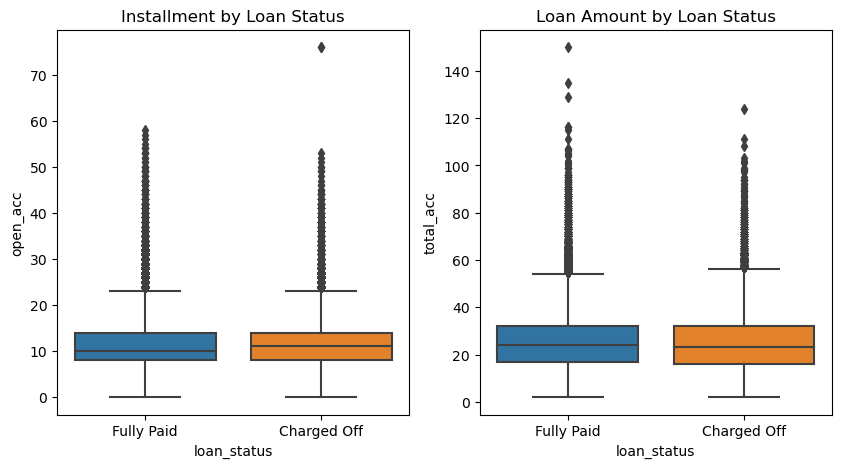

In [6]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Create boxplots with hue "loan_status"
sns.boxplot(x="loan_status", y="open_acc", data=df, ax=axs[0])
sns.boxplot(x="loan_status", y="total_acc", data=df, ax=axs[1])

# Set titles
axs[0].set_title('Installment by Loan Status')
axs[1].set_title('Loan Amount by Loan Status')

# Display the plots
plt.show()

The above charts are more or less similar in terms of the loan_status. Adopting open_acc and capping values due to outliers

:NdOverlay   [loan_status]
   :Histogram   [pub_rec]   (pub_rec_count)
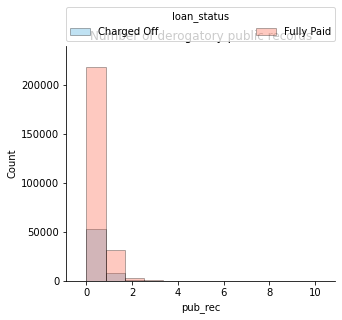

In [28]:
pub_rec_range = df[(df['pub_rec'] >=0) & (df['pub_rec'] <=10)]

title="Number of derogatory public records"

pub_rec = pub_rec_range.hvplot.hist(
    y='pub_rec',by='loan_status', bins=12, width=400, height=350, 
    title="Number of derogatory public records", xlabel='pub_rec', ylabel='Count', alpha=0.3, legend='top'
)


# Display the plot using Bokeh
pub_rec

:NdOverlay   [loan_status]
   :Histogram   [pub_rec_bankruptcies]   (pub_rec_bankruptcies_count)
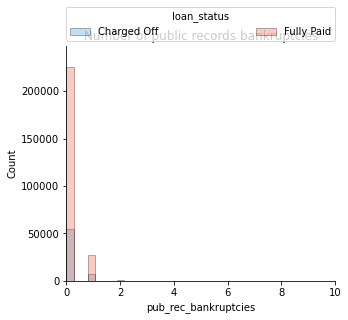

In [34]:

title="Number of public records bankruptcies"

pub_rec_bankruptcies = df.hvplot.hist(
    y='pub_rec_bankruptcies',by='loan_status', bins=30,width=400, height=350, 
    title="Number of public records bankruptcies", xlabel='pub_rec_bankruptcies', ylabel='Count', alpha=0.3, legend='top',xlim=(0, 10)
)


# Display the plot using Bokeh
pub_rec_bankruptcies

In [35]:
counts = df.groupby(['loan_status','pub_rec_bankruptcies']).size().unstack()
counts

pub_rec_bankruptcies,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
loan_status,,,,,,,,,
Charged Off,54902,6933,351,57,22,3,2,1,1
Fully Paid,225478,27354,1127,233,48,21,3,3,1


In [36]:
counts = df.groupby(['loan_status','pub_rec']).size().unstack()
counts

pub_rec,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,40.0,86.0
loan_status,,,,,,,,,,,,,,,,,
Charged Off,52496.0,8337.0,1023.0,259.0,117.0,45.0,26.0,15.0,6.0,5.0,2.0,1.0,2.0,1.0,NaN,1.0,1.0
Fully Paid,218152.0,31538.0,3378.0,949.0,317.0,145.0,78.0,33.0,21.0,6.0,7.0,6.0,NaN,2.0,1.0,NaN,NaN


The above two dataframes show that high concentration of defaulters are present for lower values of pub_rec and pub_rec_bankruptcies 

Now looking at mort_acc, we have a lot of missing values and outliers(which would be capped)

In [37]:
# group the data by loan_status and calculate the percentage of missing values in each group
missing_values = df.groupby('loan_status')['mort_acc'].apply(lambda x: x.isna().sum())
total_values = df.groupby('loan_status')['mort_acc'].count()
missing_percentages = (missing_values / sum(total_values)) * 100

# create a new dataframe to display the results
result_df = pd.concat([total_values, missing_values, missing_percentages], axis=1)
result_df.columns = ['Total Values', 'Missing Values', 'Missing Percentage']

# print out the results
print(result_df)

             Total Values  Missing Values  Missing Percentage
loan_status                                                  
Charged Off         57949            4388            1.530237
Fully Paid         228804           25829            9.007404


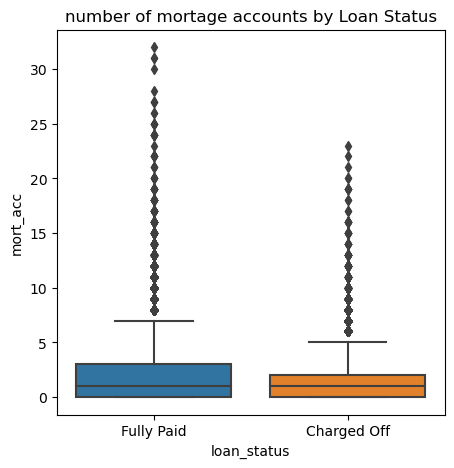

In [67]:
fig, axs = plt.subplots(ncols=1, figsize=(5,5))
sns.boxplot(x="loan_status", y="mort_acc", data=df)
axs.set_title('number of mortage accounts by Loan Status')
plt.show()

A high utilization rate can also negatively impact a borrower's credit score, as it indicates that the borrower is using a large portion of their available credit(Red Flag). A high revolving balance can indicate to lenders that the borrower is utilizing a large portion of their available credit, which can be a red flag for potential risk.
A lot of outliers present in revol_util and revol_bal. These values will be capped

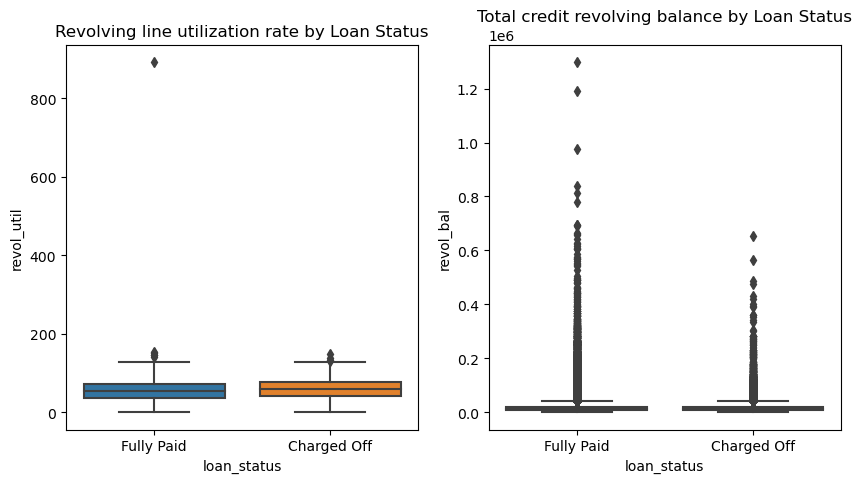

In [15]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Create boxplots with hue "loan_status"
sns.boxplot(x="loan_status", y="revol_util", data=df, ax=axs[0])
sns.boxplot(x="loan_status", y="revol_bal", data=df, ax=axs[1])

# Set titles
axs[0].set_title('Revolving line utilization rate by Loan Status')
axs[1].set_title('Total credit revolving balance by Loan Status')

# Display the plots
plt.show()

In [4]:
#### Categorical Variables Analysis
non_numeric_cols = df.select_dtypes(exclude=['float', 'int']).columns

# Print the column names
for col in non_numeric_cols:
    print(col)

term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
earliest_cr_line
initial_list_status
application_type
address


<Axes: xlabel='term', ylabel='count'>

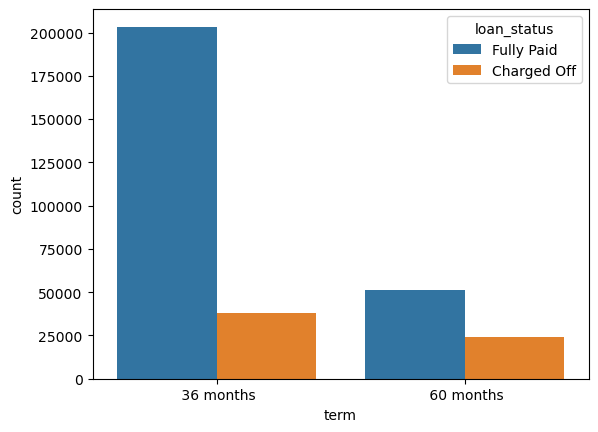

In [76]:
sns.countplot(x='term', hue='loan_status', data=df)

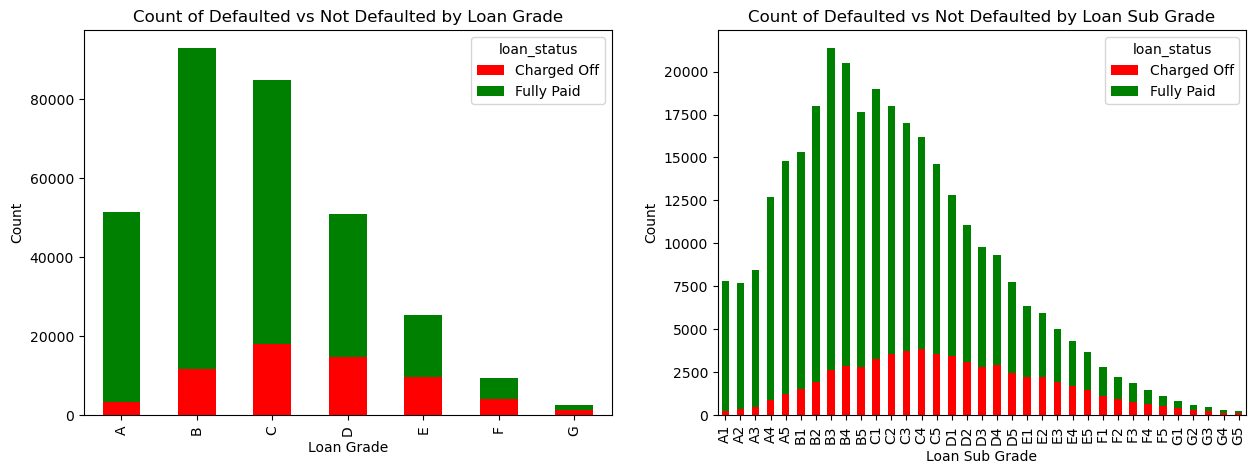

In [78]:
# create a new dataframe with loan status and employment length columns for loan grade
data_grade = pd.DataFrame({'loan_status': df['loan_status'], 'loan_grade': df['grade']})

# group by loan status and employment length and count the number of occurrences for loan grade
counts_grade = data_grade.groupby(['loan_grade', 'loan_status']).size().unstack()

# create a bar plot with two bars per loan grade for loan grade
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
counts_grade.plot(kind='bar', stacked=True, ax=axes[0], color=['red', 'green'])

# set the title and axis labels for loan grade plot
axes[0].set_title('Count of Defaulted vs Not Defaulted by Loan Grade')
axes[0].set_xlabel('Loan Grade')
axes[0].set_ylabel('Count')

# create a new dataframe with loan status and employment length columns for loan sub grade
data_sub_grade = pd.DataFrame({'loan_status': df['loan_status'], 'loan_sub_grade': df['sub_grade']})

# group by loan status and employment length and count the number of occurrences for loan sub grade
counts_sub_grade = data_sub_grade.groupby(['loan_sub_grade', 'loan_status']).size().unstack()

# create a bar plot with two bars per loan grade for loan sub grade
counts_sub_grade.plot(kind='bar', stacked=True, ax=axes[1], color=['red', 'green'])

# set the title and axis labels for loan sub grade plot
axes[1].set_title('Count of Defaulted vs Not Defaulted by Loan Sub Grade')
axes[1].set_xlabel('Loan Sub Grade')
axes[1].set_ylabel('Count')

plt.show()


From the above graphs we observe that grades of C and D have a high percentage of defaulters. We shall drop Loan Grade as loan Sub Grade captures finer details of the the loan status

Now comparing % of emplyees who defualted by title and % of employees who successfully cleared loans

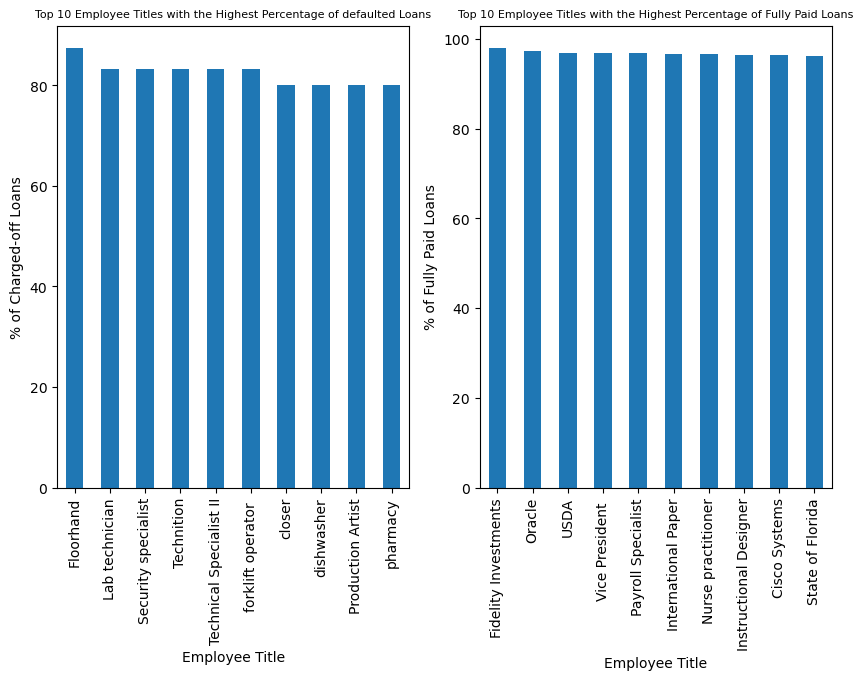

In [5]:
# Create a new DataFrame that counts the number of loans by employee title and loan status
status_count1 = df.groupby(['emp_title', 'loan_status'])['loan_status'].count().unstack()

# Create a new column in the DataFrame that calculates the percentage of fully paid loans
status_count1['Charged-off %'] = (status_count1['Charged Off'] / (status_count1['Fully Paid'] + status_count1['Charged Off'])) * 100

# Sort the DataFrame by the percentage of fully paid loans in descending order
status_count_sorted1 = status_count1.sort_values(by='Charged-off %', ascending=False)

# create a bar plot with two bars per loan grade for loan grade
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 15))


# Create a bar chart of the percentage of charged off loans by employee title
status_count_sorted1['Charged-off %'].head(10).plot(kind='bar',ax=axes[0] ,figsize=(10, 6))
axes[0].set_title('Top 10 Employee Titles with the Highest Percentage of defaulted Loans',fontsize=8)
axes[0].set_xlabel('Employee Title')
axes[0].set_ylabel('% of Charged-off Loans')



# Create a new DataFrame that counts the number of loans by employee title and loan status
status_count2 = df.groupby(['emp_title', 'loan_status'])['loan_status'].count().unstack()

# Create a new column in the DataFrame that calculates the percentage of fully paid loans
status_count2['Fully Paid %'] = (status_count2['Fully Paid'] / (status_count2['Fully Paid'] + status_count2['Charged Off'])) * 100

# Sort the DataFrame by the percentage of fully paid loans in descending order
status_count_sorted2 = status_count2.sort_values(by='Fully Paid %', ascending=False)

# Create a bar chart of the percentage of fully paid loans by employee title
status_count_sorted2['Fully Paid %'].head(10).plot(kind='bar',ax=axes[1], figsize=(10, 6))
axes[1].set_title('Top 10 Employee Titles with the Highest Percentage of Fully Paid Loans',fontsize=8)
axes[1].set_xlabel('Employee Title')
axes[1].set_ylabel('% of Fully Paid Loans')


plt.show()

Looking into purpose of loan and people who owned properties

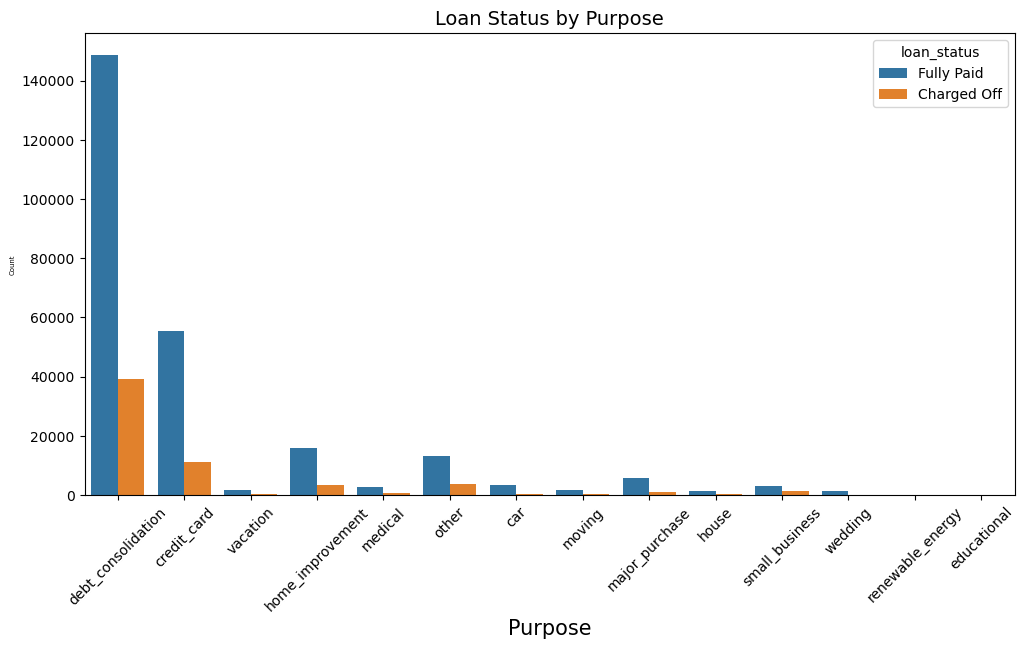

In [103]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue='loan_status', data=df, dodge=0.3)

# set plot title and axes labels
plt.title('Loan Status by Purpose', fontsize=14)
plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Count', fontsize=5)

# set figure size and x-tick label font size

plt.xticks(rotation=45)

# show plot
plt.show()

Most of the defaulters took loans to clear out previous loans and credit cards

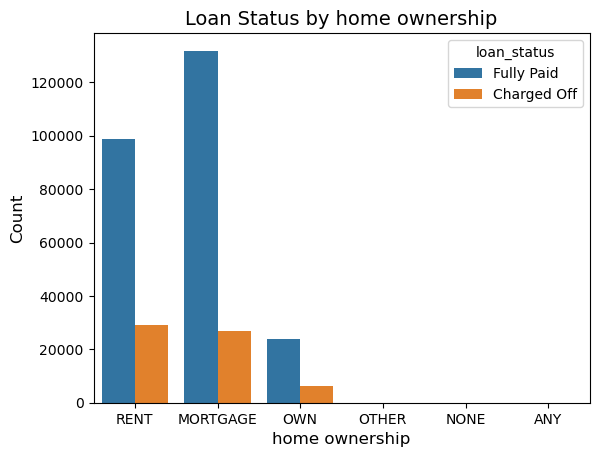

In [105]:
sns.countplot(x='home_ownership', hue='loan_status', data=df, dodge=0.3)

# set plot title and axes labels
plt.title('Loan Status by home ownership', fontsize=14)
plt.xlabel('home ownership', fontsize=12)
plt.ylabel('Count', fontsize=12)

# set figure size and x-tick label font size

plt.xticks(fontsize=10)

# show plot
plt.show()

In [38]:
# create a new dataframe with loan status and employment length columns
data = pd.DataFrame({'loan_status': df['loan_status'], 'application_type': df['application_type']})

# group by loan status and employment length and count the number of occurrences
counts = data.groupby(['loan_status','application_type']).size().unstack()

In [39]:
counts

application_type,DIRECT_PAY,INDIVIDUAL,JOINT
loan_status,,,
Charged Off,85,62208,44
Fully Paid,145,254183,305


In [40]:
counts.plot(kind = 'bar', stacked = True)

<Axes: xlabel='loan_status'>

(array([0, 1, 2]),
 [Text(0, 0, 'Verified'),
  Text(1, 0, 'Source Verified'),
  Text(2, 0, 'Not Verified')])

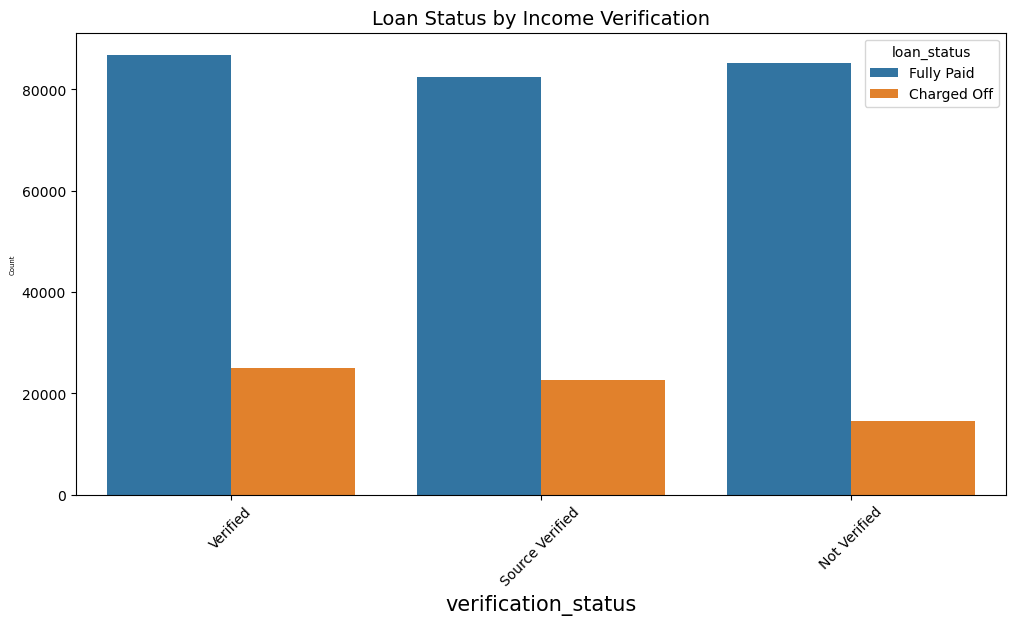

In [116]:
plt.figure(figsize=(12,6))
sns.countplot(x='verification_status', hue='loan_status', data=df, dodge=0.3)

# set plot title and axes labels
plt.title('Loan Status by Income Verification', fontsize=14)
plt.xlabel('verification_status', fontsize=15)
plt.ylabel('Count', fontsize=5)

# set figure size and x-tick label font size

plt.xticks(rotation=45)

# show plot
#plt.show()

In [118]:
df['earliest_cr_line']

0         Nov-2003
1         Jun-1999
2         Oct-1998
3         Dec-1999
4         Jul-1988
            ...   
316965    Sep-2000
316966    Aug-2002
316967    Sep-2001
316968    Aug-1990
316969    Jun-2000
Name: earliest_cr_line, Length: 316970, dtype: object

#Viewing results by earliest credit line

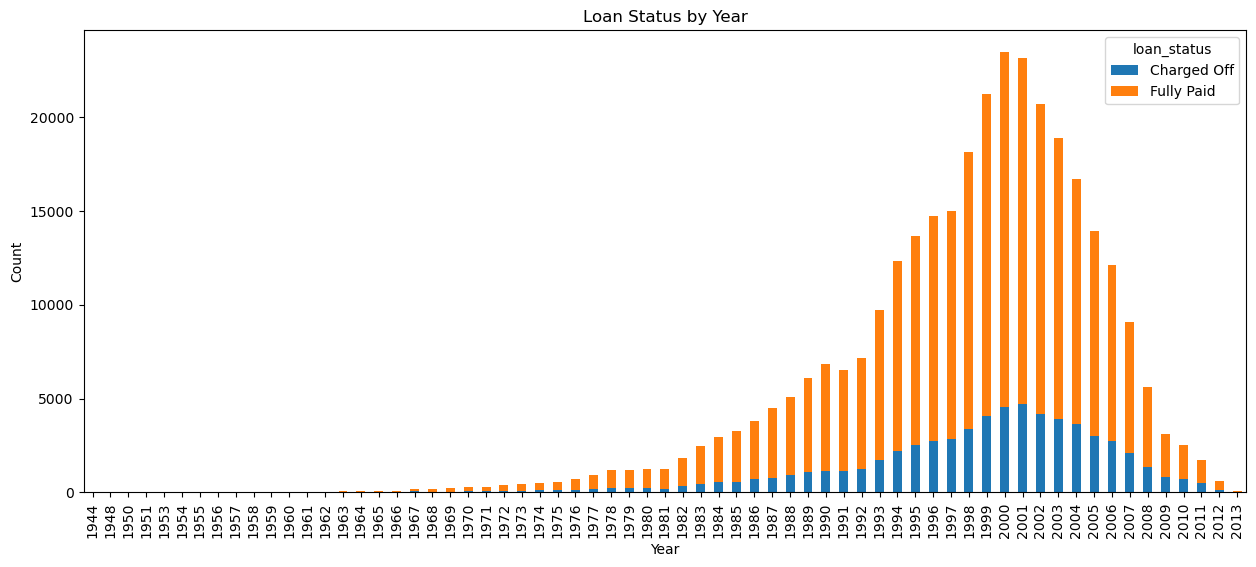

In [119]:
df['date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['year'] = df['date'].dt.year
yearly_counts = df.groupby(['year', 'loan_status'])['loan_status'].count().unstack()
yearly_counts.fillna(0, inplace=True)
yearly_counts.plot(kind='bar', stacked=True, figsize=(15, 6))

# add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Loan Status by Year')

# show the chart
plt.show()

Defaulters did peak owing to in the year 2000. earliest_cr_line will be not be used in the dataset for further analysis